In [206]:
import numpy as np
import uncertainties as unc
from matplotlib import pyplot as plt
from uncertainties import unumpy as unp
from uncertainties.umath import *
import scipy.odr as odr

In [258]:
def decompose(unparray):
    return np.array([unp.nominal_values(unparray), unp.std_devs(unparray)])

def errorplot(xarray, yarray, xlabel, ylabel):
    xnom, xerr = decompose(xarray)
    ynom, yerr = decompose(yarray)
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.errorbar(xnom, ynom, xerr = xerr, yerr = yerr, fmt = 'o', capsize = 2)
    ax.set_xlabel(xlabel, fontsize = 18)
    ax.set_ylabel(ylabel, fontsize = 18)
    ax.grid(True)
    plt.show()
    return

def findfit(xarray, yarray, func, beta0, showout = False):
    xnom, xerr = decompose(xarray)
    ynom, yerr = decompose(yarray)
    model = odr.Model(func)
    data = odr.RealData(xnom, ynom, sx = xerr, sy = yerr)
    odrfit = odr.ODR(data, model, beta0 = beta0)
    out = odrfit.run()
    if showout:
        out.pprint()
        print(out.sum_square)
    return np.array([out.beta, out.sd_beta])

def errorfitplot(xarray, yarray, xlabel, ylabel, func, fitparam, printmin = False):
    xnom, xerr = decompose(xarray)
    ynom, yerr = decompose(yarray)
    if xnom[0] <= xnom[-1]:
        fitx = np.linspace(xnom[0]-1, xnom[-1]+1, 500)
    else:
        fitx = np.linspace(xnom[0]+1, xnom[-1]-1, 500)
    fity = func(fitparam, fitx)
    if printmin:
        print(fitx[np.argmin(fity)])
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.errorbar(xnom, ynom, xerr = xerr, yerr = yerr, fmt = 'o', capsize = 2, color = 'blue')
    ax.plot(fitx, fity, color = 'red')
    ax.set_xlabel(xlabel, fontsize = 16)
    ax.set_ylabel(ylabel, fontsize = 16)
    ax.grid(True)
    plt.show()
    return

2A: Malus's Law

In [209]:
thp = unp.uarray([0, 30, 90], np.ones(3))
tha1 = unp.uarray([0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180, 200], np.ones(12))
tha2 = unp.uarray([0, 20, 40, 60, 80, 100, 120, 140, 160, 180], np.ones(10))
Vmin1 = unp.uarray([3.85, 4.24, 3.28, 1.75, 0.48, 0.12, 0.015, 0.53, 1.87, 3.33, 4.29, 4.24], np.ones(12)*0.05)
Vmax1 = unp.uarray([4.6, 5.05, 3.89, 2.07, 0.57, 0.12, 0.015, 0.53, 2.22, 3.96, 5.1, 5.04], np.ones(12)*0.05)
Vmin2 = unp.uarray([2.69, 3.88, 4.36, 3.85, 2.45, 0.96, 0.11, 0.17, 1.13, 2.56], np.ones(10)*0.05)
Vmax2 = unp.uarray([2.71, 4.70, 5.26, 4.66, 2.40, 1.12, 0.11, 0.19, 1.18, 2.57], np.ones(10)*0.05)
Vmin3 = unp.uarray([0.17, 0.2, 1.31, 3.11, 3.84, 4.33, 3.80, 2.25, 1.25, 0.16], np.ones(10)*0.05)
tha3 = unp.uarray([0, 10, 20, 30, 40, 50, 60, 70, 75, 80, 85, 90, 100, 110, 120, 130, 140, 150, 160], np.ones(19))
V4 = unp.uarray([3.98, 3.68, 3.2, 2.5, 1.78, 1.11, 0.57, 0.18, 63.6e-3, 18.7e-3, 37.9e-3, 113e-3, 0.41, 0.977, 1.8,
                2.75, 3.77, 4.45, 5.01], [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 5e-3, 5e-3, 5e-3, 5e-3, 0.05,
                                         0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
lights = unc.ufloat(17.5e-3, 5e-3)
V4 = V4 - lights

In [271]:
xlabel = r'$\Delta \theta \, (^\circ)$'
ylabel = r'$I \, (V)$'

In [212]:
def cosmodel(B, th):
    A, phi, offset = B
    return A*np.cos(np.deg2rad(th) + np.deg2rad(phi))**2 + offset

In [243]:
tha1b = -unp.uarray([0, 0, 20, 20, 40, 40, 60, 60, 80, 80, 90, 90, 100, 100, 120, 120, 140, 140, 160, 160, 180, 180, 200, 200], np.ones(24)) + unc.ufloat(0, 1)
V1 = unp.uarray([3.85, 4.6, 4.24, 5.05, 3.28, 3.89, 1.75, 2.07, 0.48, 0.57, 0.12, 0.12, 0.015, 0.015, 0.53, 0.53,
                1.87, 2.22, 3.33, 3.96, 4.29, 5.1, 4.24, 5.04], np.ones(24)*0.05) - lights

Beta: [  4.89918356  10.41265843  -0.05664512]
Beta Std Error: [ 0.15493768  1.5957699   0.1038624 ]
Beta Covariance: [[ 0.0013628   0.00141446 -0.00069654]
 [ 0.00141446  0.14456367 -0.00124044]
 [-0.00069654 -0.00124044  0.0006124 ]]
Residual Variance: 17.6149485934
Inverse Condition #: 0.0417294803576
Reason(s) for Halting:
  Sum of squares convergence
369.913920462


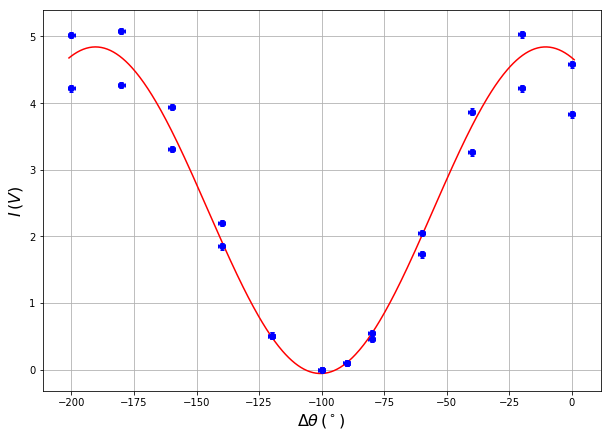

[array([[  4.89918356,  10.41265843,  -0.05664512],
        [  0.15493768,   1.5957699 ,   0.1038624 ]]),
 -0.011697401222024709+/-1.0116975015552716]

In [272]:
fitparam = findfit(tha1b, V1, cosmodel, beta0 = [4., -10., 0], showout = True)
errorfitplot(tha1b, V1, xlabel, ylabel, cosmodel, fitparam[0])
tfit = fitparam.T
vmax = unc.ufloat(tfit[0][0], tfit[0][1]) + unc.ufloat(tfit[2][0], tfit[2][1])
vmin = unc.ufloat(tfit[2][0], tfit[0][0])
[fitparam, vmin/vmax]

In [237]:
tha2b = unc.ufloat(30, 1) - unp.uarray([0, 0, 20, 20, 40, 40, 60, 60, 80, 80, 100, 100, 120, 120, 140, 140, 150, 160, 180, 180],
                   np.ones(20))
V2 = unp.uarray([2.69, 2.71, 3.88, 4.7, 4.36, 5.26, 3.85, 4.66, 2.45, 2.40, 0.96, 1.12, 0.11, 0.11, 0.17, 0.19, 1.13, 1.18, 2.56, 2.57], np.ones(20)*0.05) - lights

Beta: [ 4.92340434  8.3485325  -0.06739408]
Beta Std Error: [ 0.19652518  1.61730802  0.12731185]
Beta Covariance: [[ 0.00223873 -0.00077526 -0.0011266 ]
 [-0.00077526  0.15161771  0.00054266]
 [-0.0011266   0.00054266  0.00093951]]
Residual Variance: 17.2518446964
Inverse Condition #: 0.0447175274036
Reason(s) for Halting:
  Sum of squares convergence
293.281359838


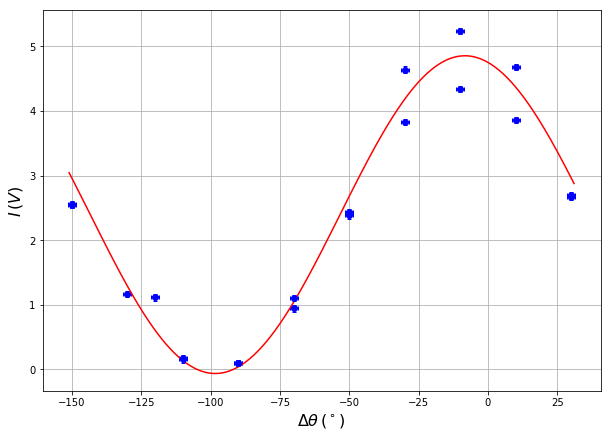

[array([[ 4.92340434,  8.3485325 , -0.06739408],
        [ 0.19652518,  1.61730802,  0.12731185]]),
 -0.013878487806674939+/-1.0138787086737577]

In [273]:
fitparam = findfit(tha2b, V2, cosmodel, beta0 = [4., -10., 0], showout = True)
errorfitplot(tha2b, V2, xlabel, ylabel, cosmodel, fitparam[0])
tfit = fitparam.T
vmax = unc.ufloat(tfit[0][0], tfit[0][1]) + unc.ufloat(tfit[2][0], tfit[2][1])
vmin = unc.ufloat(tfit[2][0], tfit[0][0])
[fitparam, vmin/vmax]

In [232]:
(unc.ufloat(-0.013877727406327976, 1.0138779482469824)+unc.ufloat(-0.011697046731796251,1.0116971470574474))/2.

-0.012787387069062114+/-0.7161493579040774

In [245]:
(unc.ufloat(4.92340434, 0.19652518)+unc.ufloat(4.89918356,0.15493768))/2.

4.91129395+/-0.1251277657614556

In [246]:
(unc.ufloat(8.3485325, 1.61730802)+unc.ufloat(10.41265843,1.5957699))/2.

9.380595464999999+/-1.1360201148419788

Beta: [  4.3042401  -10.21875996  -0.01078719]
Beta Std Error: [ 0.0947041   0.99966417  0.06539296]
Beta Covariance: [[ 0.0019576  -0.00206773 -0.00107355]
 [-0.00206773  0.21811986  0.00164491]
 [-0.00107355  0.00164491  0.00093336]]
Residual Variance: 4.58155644907
Inverse Condition #: 0.0382923539999
Reason(s) for Halting:
  Sum of squares convergence
41.2340080417


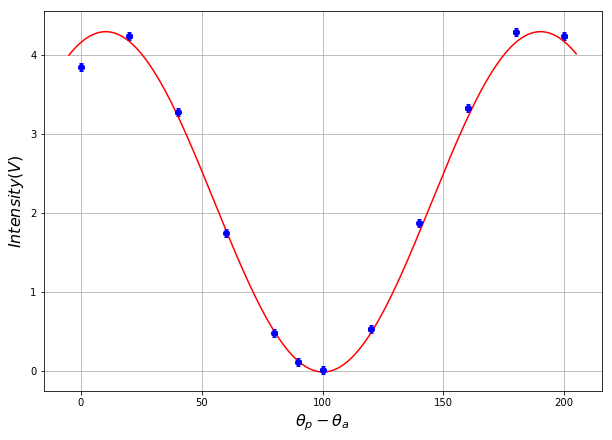

[array([[  4.3042401 , -10.21875996,  -0.01078719],
        [  0.0947041 ,   0.99966417,   0.06539296]]),
 -0.00251247535079219+/-1.0025124776129657]

In [215]:
fitparam = findfit(tha1, Vmin1-lights, cosmodel, beta0 = [4., -10., 0], showout = True)
errorfitplot(tha1, Vmin1, xlabel, ylabel, cosmodel, fitparam[0])
tfit = fitparam.T
vmax = unc.ufloat(tfit[0][0], tfit[0][1]) + unc.ufloat(tfit[2][0], tfit[2][1])
vmin = unc.ufloat(tfit[2][0], tfit[0][0])
[fitparam, vmin/vmax]

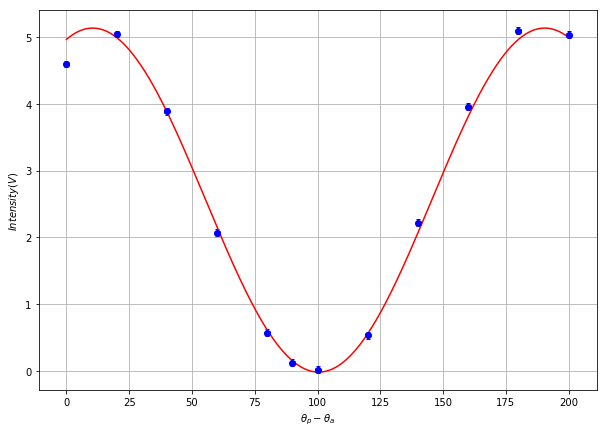

In [13]:
fitparam2 = findfit(tha1, Vmax1, cosmodel, beta0 = [4., 10., 1])
errorfitplot(tha1, Vmax1, xlabel, ylabel, cosmodel, fitparam2[0])

In [14]:
fitparam2

array([[  5.15655944, -10.44230198,  -0.02012662],
       [  0.10602814,   0.99002103,   0.07337696]])

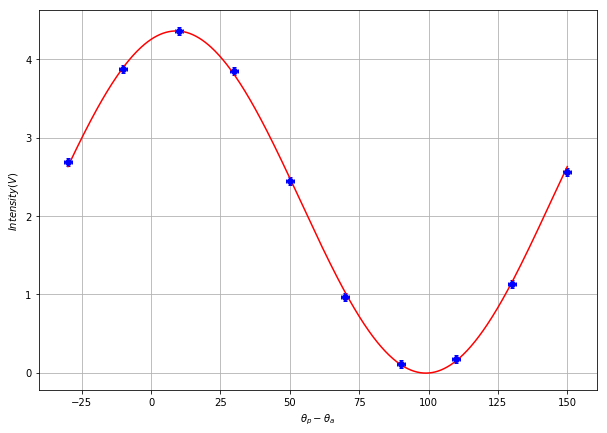

In [16]:
fitparam3 = findfit(tha2 - thp[1], Vmin2, cosmodel, beta0 = [4., 10., 1])
errorfitplot(tha2 - thp[1], Vmin2, xlabel, ylabel, cosmodel, fitparam3[0])

In [17]:
fitparam3

array([[  4.36855116e+00,  -9.02184460e+00,  -6.74845880e-03],
       [  2.88130030e-02,   2.71379107e-01,   1.91691750e-02]])

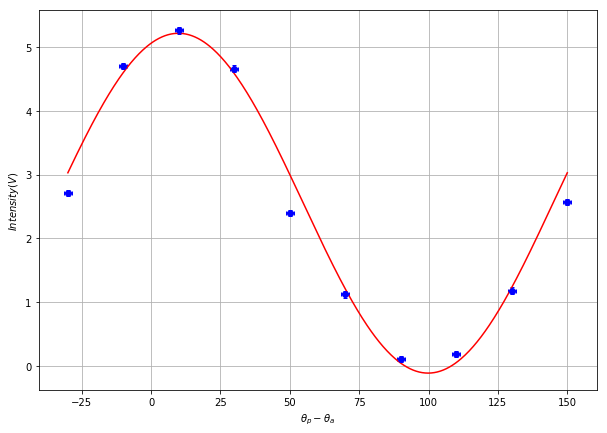

array([[ 5.32803039, -9.84368702, -0.11390408],
       [ 0.16462563,  1.33722621,  0.11451373]])

In [19]:
fitparam4 = findfit(tha2 - thp[1], Vmax2, cosmodel, beta0 = [4., -10., 1])
errorfitplot(tha2 - thp[1], Vmax2, xlabel, ylabel, cosmodel, fitparam4[0])
fitparam4

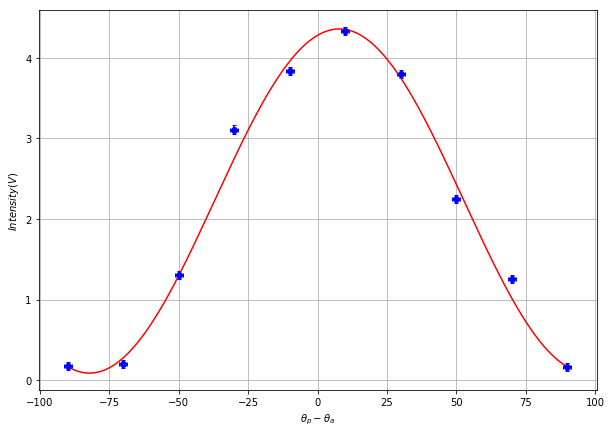

array([[ 4.27139861, -7.79843137,  0.08676286],
       [ 0.09742683,  1.08749484,  0.05909706]])

In [20]:
fitparam5 = findfit(tha2 - thp[2], Vmin3, cosmodel, beta0 = [4., -10., 1])
errorfitplot(tha2 - thp[2], Vmin3, xlabel, ylabel, cosmodel, fitparam5[0])
fitparam5

2B: Index of refraction from Brewster's Angle

In [274]:
thn = np.array([20, 30, 40, 50, 60, 70, 65, 52, 54, 56, 58, 57, 45])
p = np.argsort(thn)
thn = thn[p]
vminn = np.array([200, 148, 86, 29, 30.2, 256, 99.3, 21.4, 16.2, 14.5, 17.9, 15.7, 56.5])[p]
vminerr = np.array([1, 1, 0.1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])[p]*5
vmaxn = np.array([233, 173, 101, 31.8, 33.3, 304, 116.4, 22.3, 16.6, 14.7, 18.8, 16.1, 64.5])[p]
vmaxerr = np.array([1, 1, 1, 0.1, 0.1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])[p]*5
th = unp.uarray(thn, np.ones(13))
vmin = unp.uarray(vminn, vminerr)
vmax = unp.uarray(vmaxn, vmaxerr)

In [285]:
xlabel = r'$\theta_i \, (^\circ)$'

In [260]:
def quinticmodel(B, x):
    a, b, c, d, e, f = B
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

def sinemodel(B, x):
    a, b, c, d, e, f = B
    return a*np.sin(b*x + c) + d*np.cos(d*x + e) + f

def parmodel(B, x):
    a, b, c = B
    return a*x**2 + b*x + c

def cubicmodel(B, x):
    a, b, c, d = B
    return a*x**3 + b*x**2 + c*x + d

def quarticRoots(a, b, c, d, e):
    p = (8*a*c - 3*b*b)/(8*a*a)
    q = (b**3 - 4*a*b*c + 8*a**2*d)/(8*a**3)
    D0 = c**2 - 3*b*d + 12*a*e
    D1 = 2*c**3 - 9*b*c*d + 27*b**2*e + 27*a*d**2 - 72*a*c*e
    Q = (0.5*(D1 + (D1**2 - 4*D0**3)**0.5))**(1./3.)
    S = 0.5*(-2*p/3. + (Q + D0/Q)/(3*a))**0.5
    #x1 = -b/(4*a) - S + 0.5*(-4*S**2 - 2*p + q/S)**0.5
    #x2 = -b/(4*a) - S - 0.5*(-4*S**2 - 2*p + q/S)**0.5
    x3 = -b/(4*a) + S + 0.5*(-4*S**2 - 2*p - q/S)**0.5
    x4 = -b/(4*a) + S - 0.5*(-4*S**2 - 2*p - q/S)**0.5
    return [x3, x4]

def parroots(a, b, c):
    x1 = (-b + unp.sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b - unp.sqrt(b**2 - 4*a*c))/(2*a)
    return [x1, x2]

55.6813627255


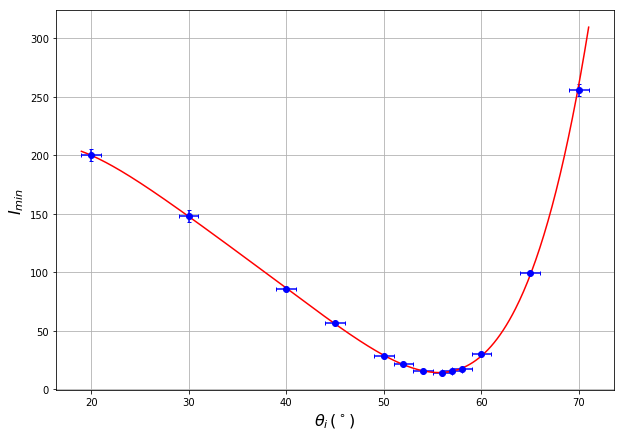

array([  6.95112154e-06,  -1.22371282e-03,   8.65707964e-02,
        -3.08678802e+00,   4.95043538e+01,  -7.43666261e+01])

In [296]:
fitparam5 = findfit(th, vmin, quinticmodel, beta0 = [1., 1., 1, 1, 1, 1])
errorfitplot(th, vmin, xlabel, r'$I_{min}$', quinticmodel, fitparam5[0], printmin = True)
fitparam5[0]

In [290]:
a, b, c, d, e, f = fitparam5[0]
roots = quarticRoots(5*a, 4*b, 3*c, 2*d, e)
unp.tan(unc.ufloat(np.deg2rad(roots[0]), np.deg2rad(1)))

array(1.4633994601381994+/-0.05483018132627845, dtype=object)

In [289]:
roots

[55.65362585635458, 15.489509831566057]

55.5771543086


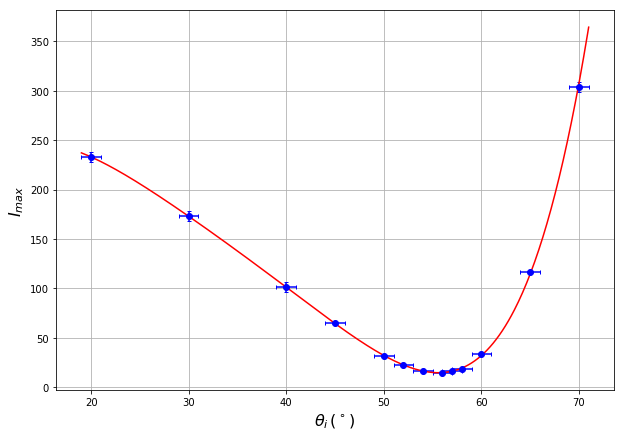

array([  7.41966582e-06,  -1.26920269e-03,   8.73700444e-02,
        -3.05615473e+00,   4.76422399e+01,  -1.70088872e+01])

In [298]:
fitparam6 = findfit(th, vmax, quinticmodel, beta0 = [1., 1., 1, 1, 1, 1])
errorfitplot(th, vmax, xlabel, r'$I_{max}$', quinticmodel, fitparam6[0], printmin = True)
fitparam6[0]

In [295]:
a, b, c, d, e, f = fitparam6[0]
roots = quarticRoots(5*a, 4*b, 3*c, 2*d, e)
unp.tan(unc.ufloat(np.deg2rad(56.1), np.deg2rad(1)))

array(1.4881569945342035+/-0.056105550316268626, dtype=object)

In [294]:
unp.tan(unc.ufloat(np.deg2rad(roots[0]), np.deg2rad(1)))

55.596732504420935

In [51]:
fitparam = findfit(th[4:11], vmin[4:11], cubicmodel, beta0 = [1., 1., 1., 1], showout = True)

Beta: [  3.81804612e-02  -5.71867697e+00   2.81687524e+02  -4.53133346e+03]
Beta Std Error: [  4.67107735e-03   7.66795585e-01   4.19155271e+01   7.62890001e+02]
Beta Covariance: [[  2.26802006e-03  -3.72248318e-01   2.03377214e+01  -3.69844852e+02]
 [ -3.72248318e-01   6.11184005e+01  -3.34035541e+03   6.07657712e+04]
 [  2.03377214e+01  -3.34035541e+03   1.82626012e+05  -3.32335330e+06]
 [ -3.69844852e+02   6.07657712e+04  -3.32335330e+06   6.04973872e+07]]
Residual Variance: 0.0096202692451
Inverse Condition #: 2.74414105548e-10
Reason(s) for Halting:
  Sum of squares convergence
0.0288608077353


In [62]:
findfit(th, vmin, quinticmodel, beta0 = [1., 1., 1., 1, 1., 1.], showout = True)

Beta: [  6.99120296e-06  -1.23281250e-03   8.73787860e-02  -3.12169976e+00
   5.02313567e+01  -8.00911764e+01]
Beta Std Error: [  8.26962059e-07   1.81875051e-04   1.55204744e-02   6.38389199e-01
   1.25573068e+01   9.36181356e+01]
Beta Covariance: [[  4.32420555e-11  -9.49724925e-09   8.07176901e-07  -3.29800428e-05
    6.42872938e-04  -4.74281747e-03]
 [ -9.49724925e-09   2.09161341e-06  -1.78248560e-04   7.30217993e-03
   -1.42694146e-01   1.05501733e+00]
 [  8.07176901e-07  -1.78248560e-04   1.52315867e-02  -6.25657502e-01
    1.22577388e+01  -9.08355260e+01]
 [ -3.29800428e-05   7.30217993e-03  -6.25657502e-01   2.57695136e+01
   -5.06216546e+02   3.76031091e+03]
 [  6.42872938e-04  -1.42694146e-01   1.22577388e+01  -5.06216546e+02
    9.97075793e+03  -7.42480751e+04]
 [ -4.74281747e-03   1.05501733e+00  -9.08355260e+01   3.76031091e+03
   -7.42480751e+04   5.54185472e+05]]
Residual Variance: 0.015814841321
Inverse Condition #: 8.08195634863e-13
Reason(s) for Halting:
  Sum of squ

array([[  6.99120296e-06,  -1.23281250e-03,   8.73787860e-02,
         -3.12169976e+00,   5.02313567e+01,  -8.00911764e+01],
       [  8.26962059e-07,   1.81875051e-04,   1.55204744e-02,
          6.38389199e-01,   1.25573068e+01,   9.36181356e+01]])

In [53]:
an, bn, cn, dn = fitparam[0]
aerr, berr, cerr, derr = fitparam[1]
a = unc.ufloat(an, aerr)
b = unc.ufloat(bn, berr)
c = unc.ufloat(cn, cerr)
d = unc.ufloat(dn, derr)

In [61]:
parroots(3*a, 2*b, c)

[55.70724918193011+/-79.0100869298661, 44.14621504312402+/-63.57001403271294]

55.7114228457


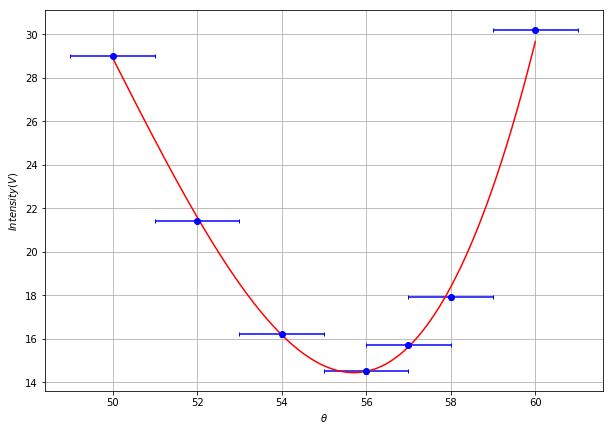

In [52]:
errorfitplot(th[4:11], vmin[4:11], xlabel, ylabel, cubicmodel, fitparam[0], printmin = True)

In [259]:
fitparam2 = findfit(th, vmax, quinticmodel, beta0 = [1., 1., 1., 1., 1., 1.], showout = True)

Beta: [  7.46024112e-06  -1.27826445e-03   8.81508562e-02  -3.08841283e+00
   4.82764845e+01  -2.17194738e+01]
Beta Std Error: [  8.00672467e-07   1.76196559e-04   1.50403135e-02   6.18594473e-01
   1.21622350e+01   9.06113191e+01]
Beta Covariance: [[  6.09486123e-11  -1.33942376e-08   1.13881106e-06  -4.65353437e-05
    9.06958627e-04  -6.68907923e-03]
 [ -1.33942376e-08   2.95154139e-06  -2.51614020e-04   1.03081976e-02
   -2.01388769e-01   1.48842191e+00]
 [  1.13881106e-06  -2.51614020e-04   2.15064044e-02  -8.83379673e-01
    1.73014558e+01  -1.28153527e+02]
 [ -4.65353437e-05   1.03081976e-02  -8.83379673e-01   3.63802855e+01
   -7.14356920e+02   5.30354639e+03]
 [  9.06958627e-04  -2.01388769e-01   1.73014558e+01  -7.14356920e+02
    1.40630918e+04  -1.04655246e+05]
 [ -6.68907923e-03   1.48842191e+00  -1.28153527e+02   5.30354639e+03
   -1.04655246e+05   7.80582729e+05]]
Residual Variance: 0.0105183100258
Inverse Condition #: 9.84234403029e-13
Reason(s) for Halting:
  Sum of sq

2C: Fresnel Reflection by Dielectric

In [356]:
th = np.array([10, 20, 30, 40, 50, 60, 70, 80, 55, 65, 45, 75])
Ir = np.array([281, 219, 161, 82.2, 39, 43.1, 304, 1737, 17.6, 104.5, 69, 649])
p = np.argsort(th)
th = th[p]
Ir = Ir[p]
th = unp.uarray(th, np.ones(12))
Ir = unp.uarray(Ir, np.ones(12)*10)
Ii = unc.ufloat(5.8e3, 10)
R = (Ir/Ii)

In [334]:
def fresnelpar(B, x):
    n = B[0]
    x = np.deg2rad(x)
    r = ((n**2*np.cos(x) - (n**2-np.sin(x)**2)**0.5)/(n**2*np.cos(x) + (n**2-np.sin(x)**2)**0.5))**2
    return r

def fresnelpar2(B, x):
    n, phi = B
    x = np.deg2rad(x+phi)
    r = ((n**2*np.cos(x) - (n**2-np.sin(x)**2)**0.5)/(n**2*np.cos(x) + (n**2-np.sin(x)**2)**0.5))**2
    return r

def fresnelperp(B, x):
    n = B
    x = np.deg2rad(x)
    r = ((np.cos(x) - np.sqrt(n**2 - np.sin(x)**2))/(np.cos(x) + np.sqrt(n**2 - np.sin(x)**2)))**2
    return r

def fresnelperp2(B, x):
    n, phi = B
    x = np.deg2rad(x+phi)
    r = ((np.cos(x) - np.sqrt(n**2 - np.sin(x)**2))/(np.cos(x) + np.sqrt(n**2 - np.sin(x)**2)))**2
    return r

Beta: [ 1.55053154]
Beta Std Error: [ 0.01378344]
Beta Covariance: [[  7.65429837e-05]]
Residual Variance: 2.48204612443
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
27.3025073687


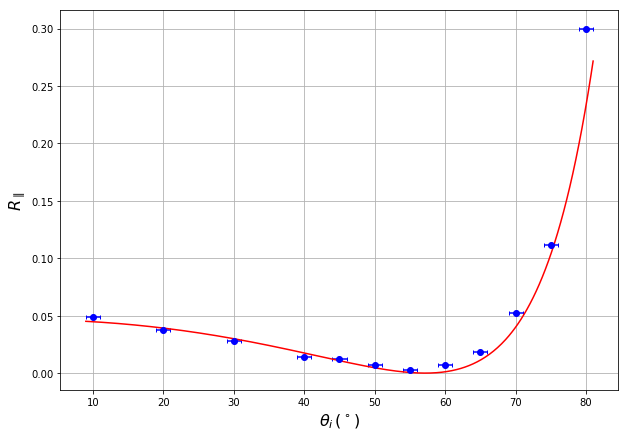

In [357]:
fitparam1 = findfit(th, R, fresnelpar, beta0 = [1.], showout = True)
errorfitplot(th, R, xlabel, r'$R_{\parallel}$', fresnelpar, fitparam1[0])

Beta: [ 1.56657697  1.57817861]
Beta Std Error: [ 0.01309119  0.58485596]
Beta Covariance: [[  1.06055122e-04   2.28257546e-03]
 [  2.28257546e-03   2.11675744e-01]]
Residual Variance: 1.61594564116
Inverse Condition #: 0.01977480578
Reason(s) for Halting:
  Sum of squares convergence
16.1594564116


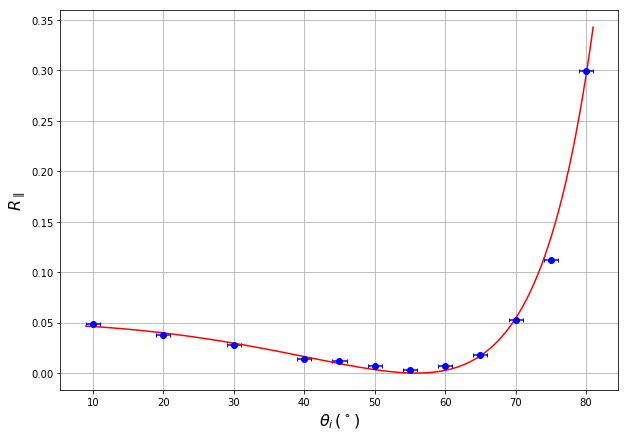

In [358]:
fitparam2 = findfit(th, R, fresnelpar2, beta0 = [1., 1.], showout = True)
errorfitplot(th, R, xlabel, r'$R_{\parallel}$', fresnelpar2, fitparam2[0])

In [127]:
xlabel = r'$\theta_i \: (^\circ)$'
ylabel = r'$R_\parallel$'

In [319]:
th2 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 35, 25, 75])
Ir2 = np.array([287, 314, 364, 410, 598, 956, 1661, 2920, 395, 318, 2060])
p = np.argsort(th2)
th2 = unp.uarray(th2[p], np.ones(11))
Ir2 = Ir2[p]
Ir2 = unp.uarray(Ir2, 10*np.ones(11))
Ii2 = unc.ufloat(6.28e3, 10.)
R2 = Ir2/Ii2

Beta: [ 1.48547141]
Beta Std Error: [ 0.01206277]
Beta Covariance: [[  2.24728942e-05]]
Residual Variance: 6.47493380256
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
64.7493380256


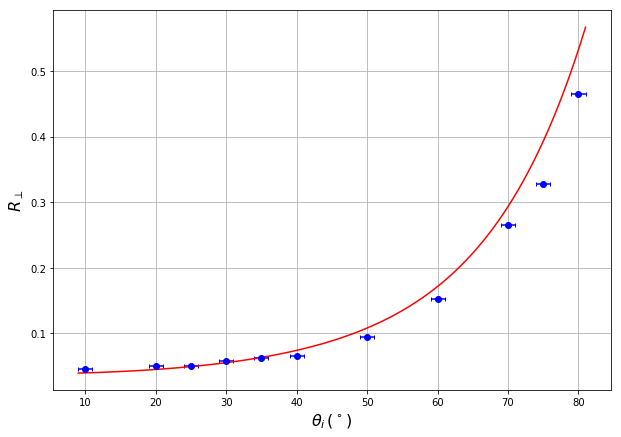

In [337]:
fitparam3 = findfit(th2, R2, fresnelperp, beta0 = [1.], showout = True)
errorfitplot(th2, R2, xlabel, r'$R_{\perp}$', fresnelperp, fitparam3[0])

Beta: [ 1.52340974 -4.07455471]
Beta Std Error: [ 0.0095948  0.7998467]
Beta Covariance: [[  4.80679849e-05  -2.95488560e-03]
 [ -2.95488560e-03   3.34039374e-01]]
Residual Variance: 1.91520760817
Inverse Condition #: 0.0080953339778
Reason(s) for Halting:
  Sum of squares convergence
17.2368684735


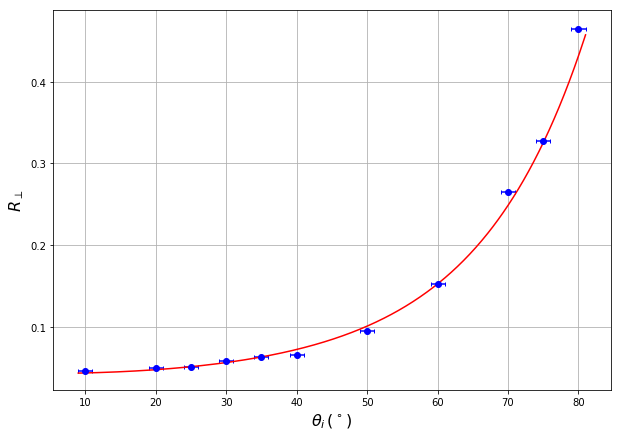

In [338]:
fitparam4 = findfit(th2, R2, fresnelperp2, beta0 = [1., 1.], showout = True)
errorfitplot(th2, R2, xlabel, r'$R_{\perp}$', fresnelperp2, fitparam4[0])

In [351]:
th3 = unp.uarray(np.deg2rad([10, 20, 30, 40, 50, 60, 70, 80]), np.deg2rad(np.ones(8)))
th3deg = unp.uarray([10, 20, 30, 40, 50, 60, 70, 80], np.ones(8))
alpha = unp.uarray(np.deg2rad([56, 60, 65, 77, 93, 110, 122, 136]), np.deg2rad(np.ones(8)))
a0 = unc.ufloat(np.deg2rad(101.), np.deg2rad(1.))
psi = alpha - a0

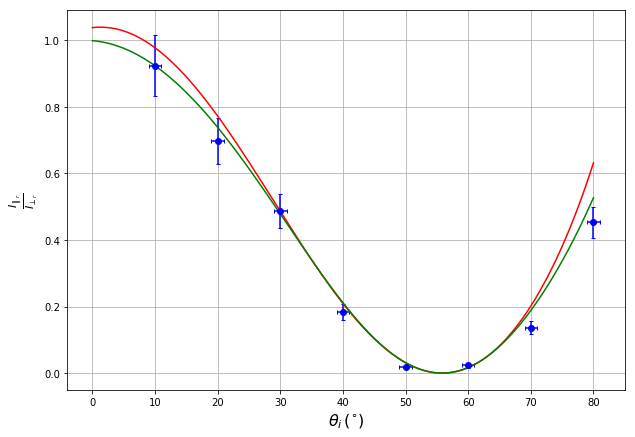

In [388]:
thvec = np.linspace(0, 80, 500)
yvec = fresnelpar2(fitparam2[0], thvec)/fresnelperp2(fitparam4[0], thvec)*(5.8/6.28)
yvec2 = fresnel2(fit[0], thvec)
yaxis = Ii*unp.tan(psi)**2/Ii2
fig, ax = plt.subplots(figsize = (10, 7))
yax, yaxerr = decompose(yaxis)
th, therr = decompose(th3deg)
ax.errorbar(th, yax, xerr = therr, yerr = yaxerr, fmt = 'o', capsize = 2, color = 'blue')
ax.plot(thvec, yvec, color = 'red')
ax.plot(thvec, yvec2, color = 'green')
ax.set_xlabel(xlabel, fontsize = 16)
ax.set_ylabel(r'$\frac{I_{\parallel_r}}{I_{\perp_r}}$', fontsize = 16)
ax.grid(True)
plt.show()
plt.show()

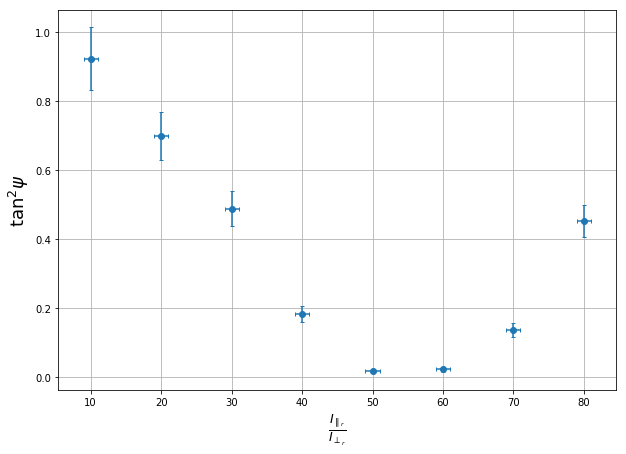

In [353]:
errorplot(th3deg, unp.tan(psi)**2*(5.8/6.28), r'$\frac{I_{\parallel_r}}{I_{\perp_r}}$', r'$\tan^2 \psi$')

In [380]:
xlabel = r'$\theta_i \, (^{\circ})$'
ylabel = r'$\frac{I_{\perp_i}}{I_{\parallel_i}} \tan^2 \psi $'

In [370]:
def fresnel2(B, x):
    n, phi = B
    x = np.deg2rad(x)
    phi = np.deg2rad(phi)
    return ((-1 + np.cos(2*(x+phi)) + 2*np.cos(x+phi)*(n**2 - np.sin(x+phi)**2))/(-1 + np.cos(2*(x+phi)) - 2*np.cos(x+phi)*(n**2 - np.sin(x+phi)**2)))**2

In [374]:
def fresnel3(B, x):
    n1, n2, phi1, phi2 = B
    x = np.deg2rad(x)
    phi1 = np.deg2rad(phi1)
    phi2 = np.deg2rad(phi2)
    return ((-1 + np.cos(2*(x+phi1)) + 2*np.cos(x+phi1)*(n1**2 - np.sin(x+phi1)**2))/(-1 + np.cos(2*(x+phi1)) - 2*np.cos(x+phi2)*(n2**2 - np.sin(x+phi2)**2)))**2

In [376]:
def fresnel4(B, x):
    n = B[0]
    x = np.deg2rad(x)
    #phi = np.deg2rad(phi)
    return ((-1 + np.cos(2*(x)) + 2*np.cos(x)*(n**2 - np.sin(x)**2))/(-1 + np.cos(2*(x)) - 2*np.cos(x)*(n**2 - np.sin(x)**2)))**2

In [391]:
yaxis = Ii*unp.tan(psi)**2/Ii2
fit = findfit(th3deg, yaxis, fresnel2, beta0 = [1., 1.], showout = True)

Beta: [ 1.41494275  1.29194812]
Beta Std Error: [ 0.09523878  2.96360725]
Beta Covariance: [[ 0.0082311   0.250879  ]
 [ 0.250879    7.97024035]]
Residual Variance: 1.10197027156
Inverse Condition #: 0.00631685566431
Reason(s) for Halting:
  Sum of squares convergence
6.61182162935


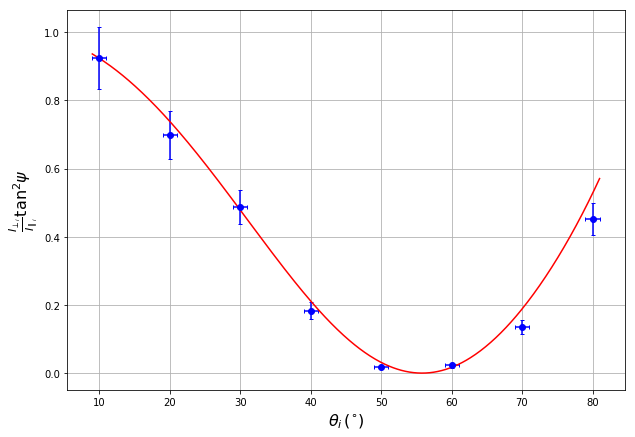

In [392]:
errorfitplot(th3deg, yaxis, xlabel, ylabel, fresnel2, fit[0])

In [377]:
yaxis = Ii*unp.tan(psi)**2/Ii2
fit = findfit(th3deg, yaxis, fresnel4, beta0 = [1.], showout = True)

Beta: [ 1.3763599]
Beta Std Error: [ 0.01748718]
Beta Covariance: [[ 0.00030434]]
Residual Variance: 1.00480048353
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
7.0336033847


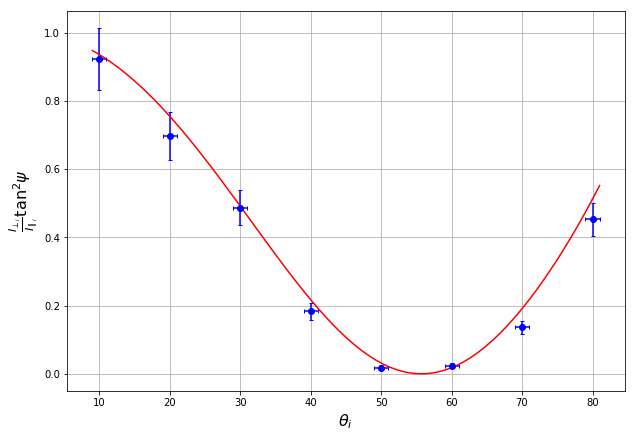

In [378]:
errorfitplot(th3deg, yaxis, xlabel, ylabel, fresnel4, fit[0])

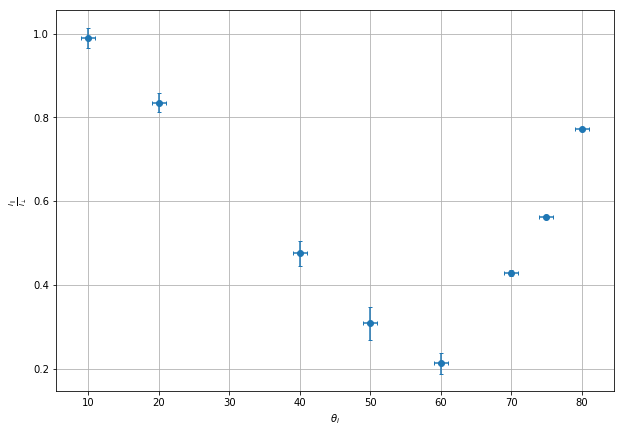

In [163]:
yvec = (np.take(Er,[0,1,3,5,7,9,10,11])/(np.take(Er2, [0, 1, 3, 5, 7, 8, 9, 10])))**0.5
xvec = np.take(theta, [0,1,3,5,7,9,10,11])
errorplot(xvec, yvec, xlabel, ylabel)

2E: Birefringence

In [456]:
th = unp.uarray(np.linspace(0, 350, 36), np.ones(36))
voltage = unp.uarray([2.05, 2.25, 2.45, 2.65, 2.82, 2.93, 3.00, 3.01, 2.96, 2.85, 2.71, 2.54, 2.37, 2.24, 2.07, 2.08,
                   2.14, 2.24, 2.39, 2.55, 2.71, 2.84, 2.92, 2.96, 2.96, 2.94, 2.86, 2.75, 2.56, 2.38, 2.17, 2.,
                   1.87, 1.81, 1.80, 1.86], np.ones(36)*0.1)

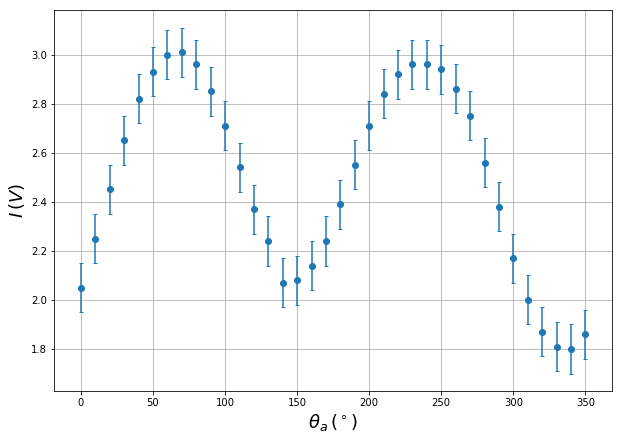

In [459]:
errorplot(th, voltage, r'$\theta_a \, (^\circ)$', r'$I \, (V)$')

In [183]:
def cossinmodel(B, x):
    A, C, phi = B
    x = np.deg2rad(x)
    phi = np.deg2rad(phi)
    return A*(np.cos(x/C+phi)**4 + np.sin(x/C+phi)**4)**0.5

In [190]:
param = findfit(th, voltage, cossinmodel, [3., 3., -50.], showout = True)

Beta: [  2.67068894   7.11005458 -18.29222035]
Beta Std Error: [ 0.09140416  1.83934217  7.61868043]
Beta Covariance: [[  6.78390822e-04  -9.48122244e-03  -3.02275720e-02]
 [ -9.48122244e-03   2.74709148e-01   1.03055918e+00]
 [ -3.02275720e-02   1.03055918e+00   4.71311005e+00]]
Residual Variance: 12.3154967535
Inverse Condition #: 0.030201399994
Reason(s) for Halting:
  Sum of squares convergence
406.411392864


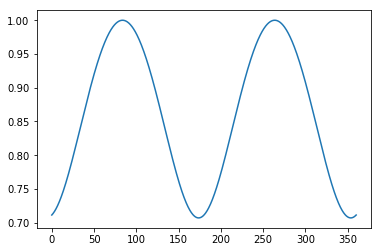

In [182]:
xvec = np.deg2rad(np.linspace(0, 360, 1000))
yvec = (np.cos(xvec/2.-40)**4+np.sin(xvec/2.-40)**4)**0.5
plt.plot(np.rad2deg(xvec), yvec)
plt.show()

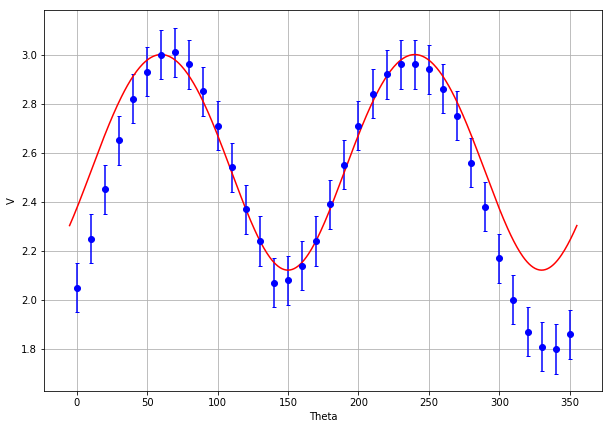

In [192]:
errorfitplot(th, voltage, 'Theta', 'V', cossinmodel, [3., 2., -30])

In [448]:
def transparency(t, qw, an):
    err = np.deg2rad(1)
    teig = unc.ufloat(np.deg2rad(62), err)
    qweig = unc.ufloat(np.deg2rad(65), err)
    aneig = unc.ufloat(np.deg2rad(101), err)
    t = unc.ufloat(np.deg2rad(t), err)
    qw = unc.ufloat(np.deg2rad(qw), err)
    an = unc.ufloat(np.deg2rad(an), err)
    anr = an + aneig - np.pi/2
    qwr = qw + qweig - np.pi/2
    tr = t + teig - np.pi/2
    psi = qwr - tr
    th = anr - qwr
    return unp.arctan(-unp.tan(2*th)/unp.sin(2*psi))*180/np.pi

In [454]:
phi1 = transparency(107, 200, 100)
phi2 = transparency(120, 210, 90)
phi3 = transparency(130, 215, 85)
phi4 = transparency(140, 223, 85)
[phi1, phi2, phi3, phi4]

[80.77355153691322+/-3.8024915318859236,
 63.813528243544106+/-20.12904076344775,
 63.60281378238287+/-30.262595540876372,
 72.64138710820815+/-9.996498861134063]

In [455]:
(phi1 + phi2 + phi3 + phi4)/4.

70.20782016776208+/-9.471641562639531

63.60281378238287+/-30.26259554087637

72.64138710820815+/-9.996498861134063

In [401]:
def transparency2(t, qw, an):
    teig, qweig, aneig = 20, 65, 101
    anr = an + aneig - 90
    qwr = qw + qweig - 90
    tr = t + teig
    psi = np.deg2rad(np.abs(qwr - tr))
    th = np.deg2rad(np.abs(anr - qwr))
    return np.rad2deg(np.arctan(-np.tan(2*th)/np.sin(2*psi)))

In [402]:
transparency2(165, 86, 332)

25.650067291869743

In [436]:
np.rad2deg(1)

57.295779513082323

In [437]:
180/np.pi

57.29577951308232